In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.enable_eager_execution()

In [2]:
m = 2
b = 0.5
x = np.linspace(0,4,100)
y = m*x + b + np.random.randn(*x.shape)+0.2


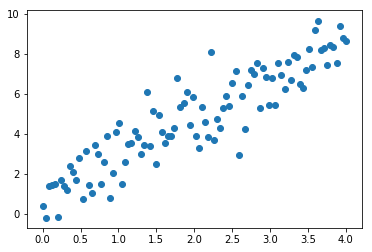

In [3]:
plt.scatter(x,y)

In [4]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
    
    def __call__(self, x):
        return self.weight*x + self.bias

In [5]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [6]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
 
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [8]:
model = Model()
epochs = 100
learning_rate = 0.15

for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, loss: 724.413818359375
Epoch: 1, loss: 514.4773559570312
Epoch: 2, loss: 365.6416015625
Epoch: 3, loss: 260.10101318359375
Epoch: 4, loss: 185.2417755126953
Epoch: 5, loss: 132.1275634765625
Epoch: 6, loss: 94.42703247070312
Epoch: 7, loss: 67.6542739868164
Epoch: 8, loss: 48.630531311035156
Epoch: 9, loss: 35.103214263916016
Epoch: 10, loss: 25.475793838500977
Epoch: 11, loss: 18.616561889648438
Epoch: 12, loss: 13.72320556640625
Epoch: 13, loss: 10.226766586303711
Epoch: 14, loss: 7.723680019378662
Epoch: 15, loss: 5.927593231201172
Epoch: 16, loss: 4.635250091552734
Epoch: 17, loss: 3.702303409576416
Epoch: 18, loss: 3.0261754989624023
Epoch: 19, loss: 2.5339195728302
Epoch: 20, loss: 2.1736183166503906
Epoch: 21, loss: 1.9082757234573364
Epoch: 22, loss: 1.711495041847229
Epoch: 23, loss: 1.5644129514694214
Epoch: 24, loss: 1.4535223245620728
Epoch: 25, loss: 1.3691290616989136
Epoch: 26, loss: 1.304255485534668
Epoch: 27, loss: 1.253862738609314
Epoch: 28, loss: 1.214298

In [9]:
print(model.weight.numpy(), model.bias.numpy())

1.9079177 0.9988706


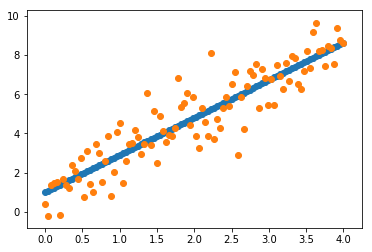

In [11]:
new_y = model.weight.numpy()*x + model.bias.numpy()
plt.scatter(x, new_y)
plt.scatter(x, y)
